In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3

In [ ]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
!pip install --upgrade -q jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 92.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.18.0 requires pandas>=1.5.3, but you have pandas 1.5.2 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.2 which is incompatible.
ibis-framework 9.2.0 requires pandas<3,>=1.5.3, but you have pandas 1.5.2 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.2 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.2 which is incompatible.
xarray 2024.9.0 requires pandas>=2.1, but you have pandas 1.5.2 which is incompatible.


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Credit+Card+Customer+Data.xlsx"

In [ ]:
df = pd.read_excel(path)

In [ ]:
data = df.copy()

In [ ]:
data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [ ]:
data.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [ ]:
data.shape

(660, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [ ]:
data.drop('Sl_No', axis=1, inplace=True)

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

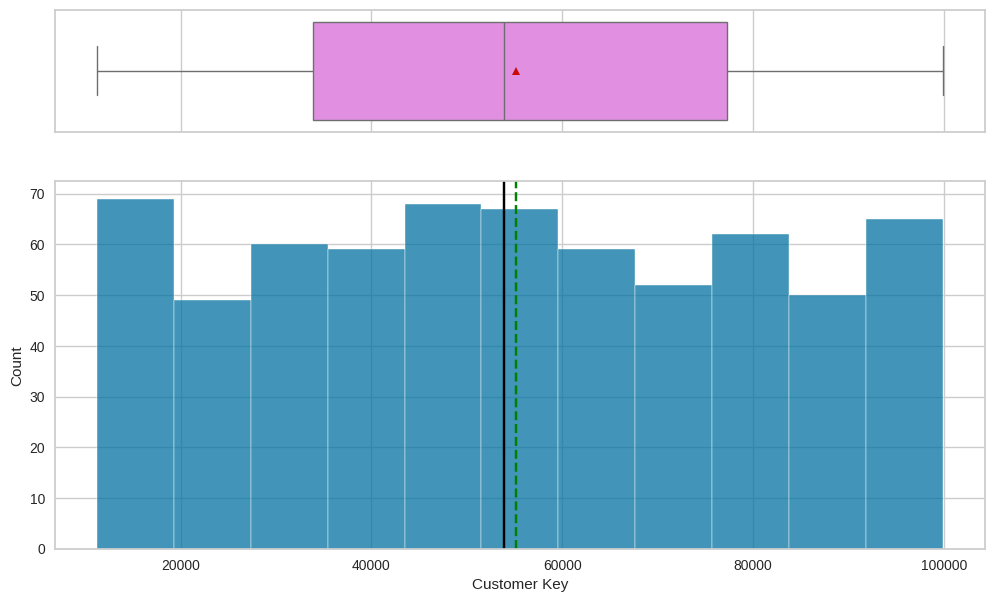

In [ ]:
histogram_boxplot(data, 'Customer Key')

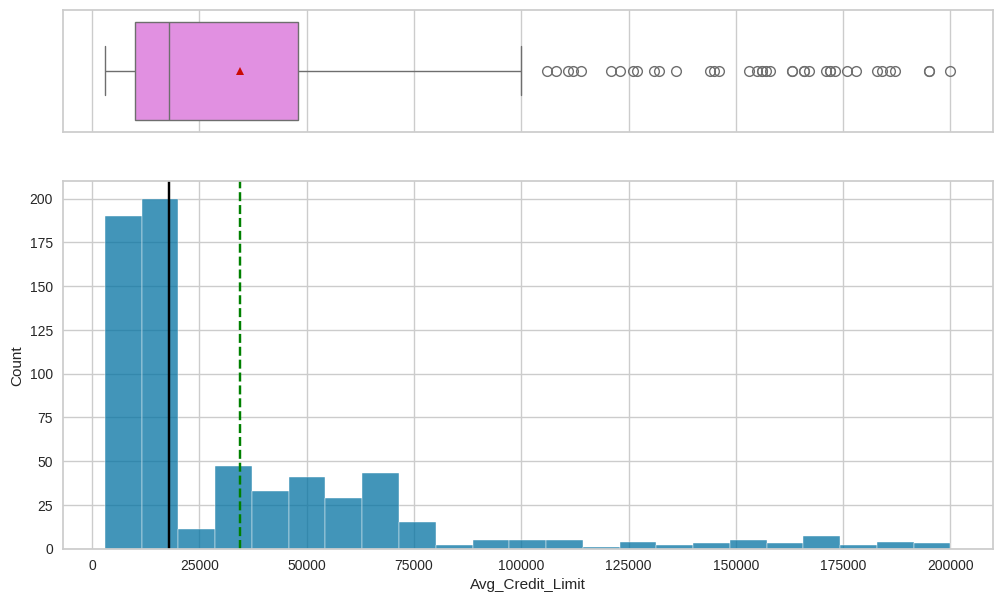

In [ ]:
histogram_boxplot(data, 'Avg_Credit_Limit')

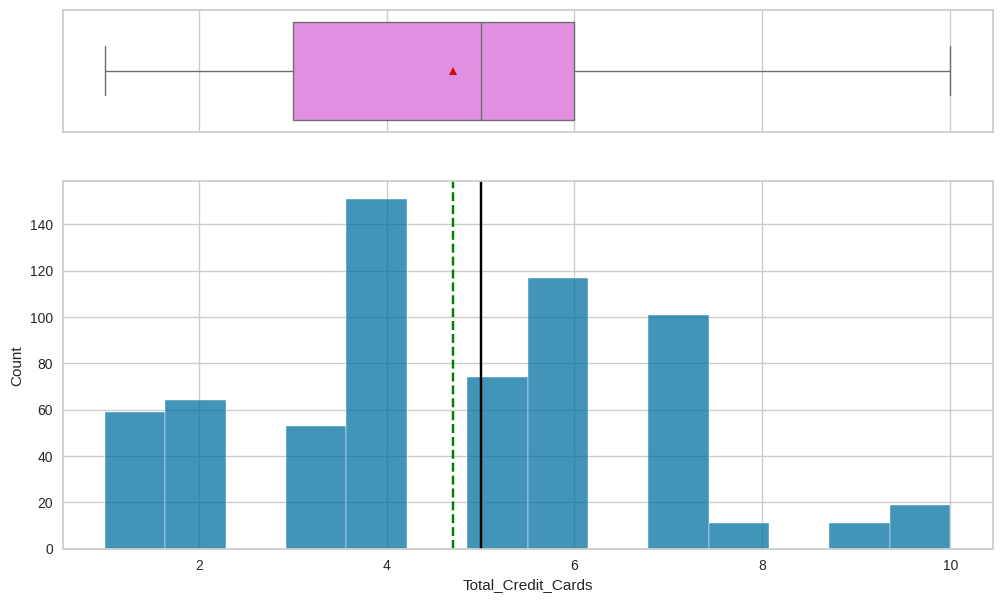

In [ ]:
histogram_boxplot(data, 'Total_Credit_Cards')

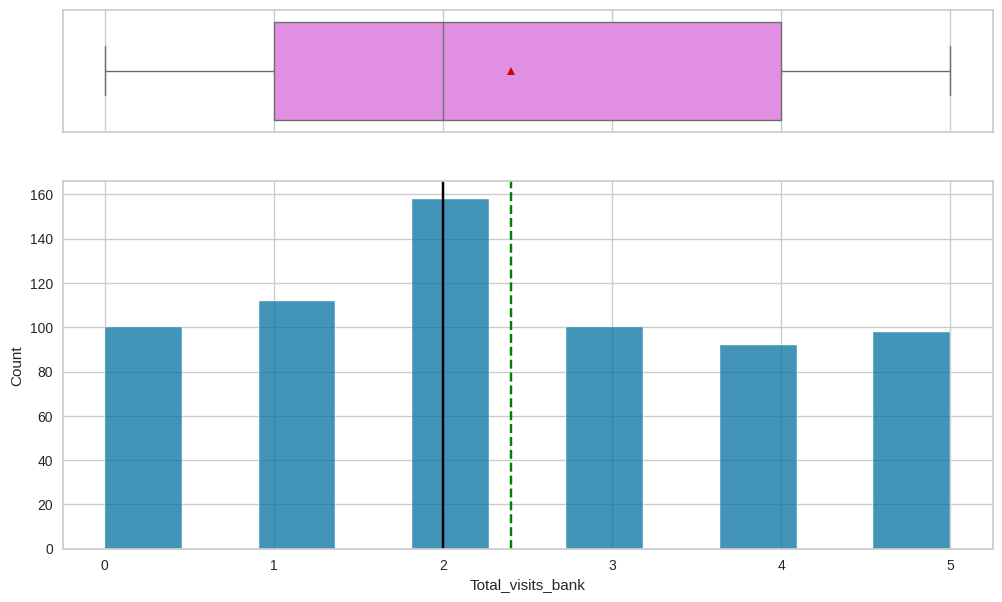

In [ ]:
histogram_boxplot(data, 'Total_visits_bank')

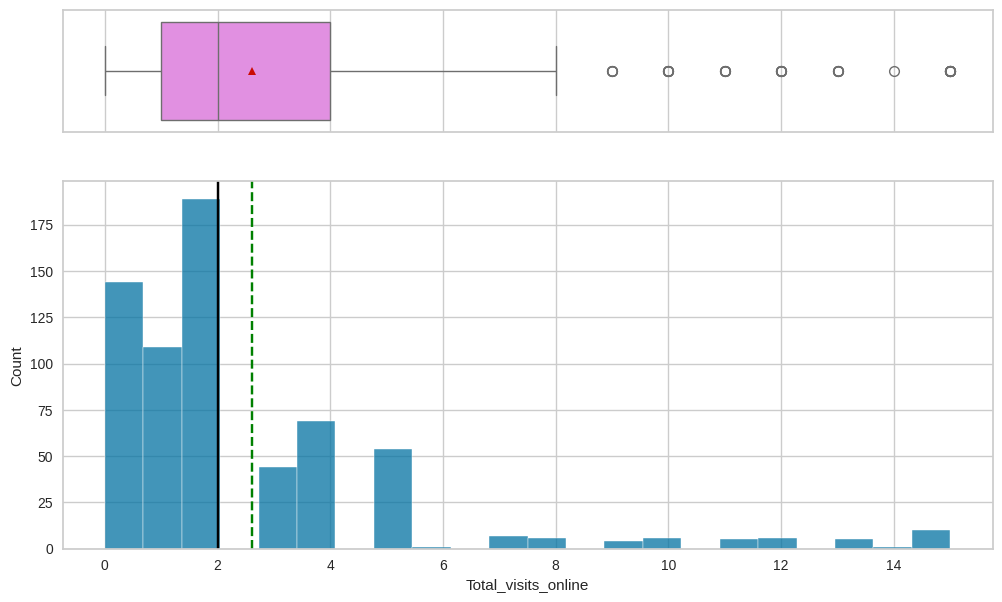

In [ ]:
histogram_boxplot(data, 'Total_visits_online')

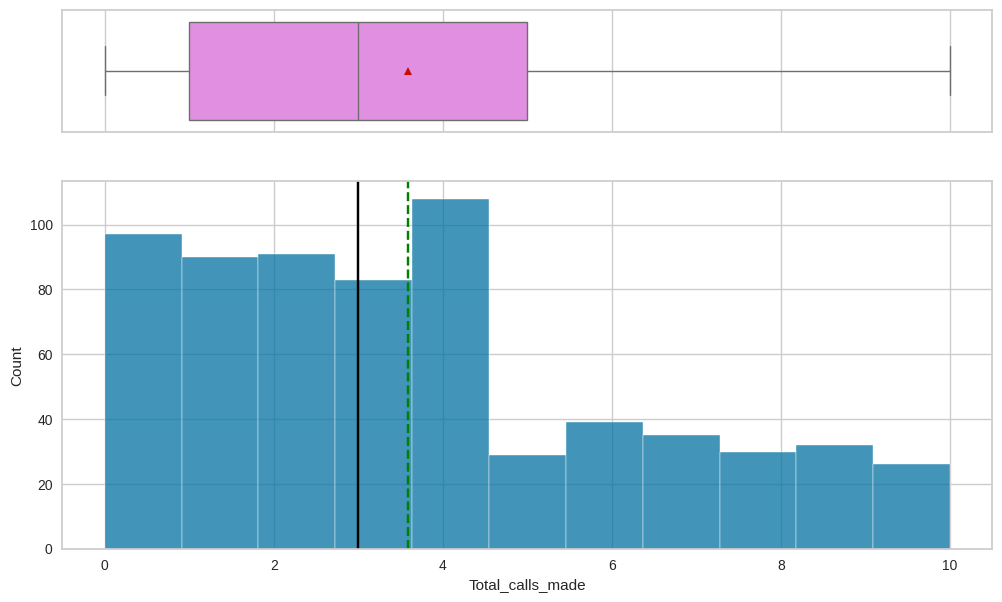

In [ ]:
histogram_boxplot(data, 'Total_calls_made')

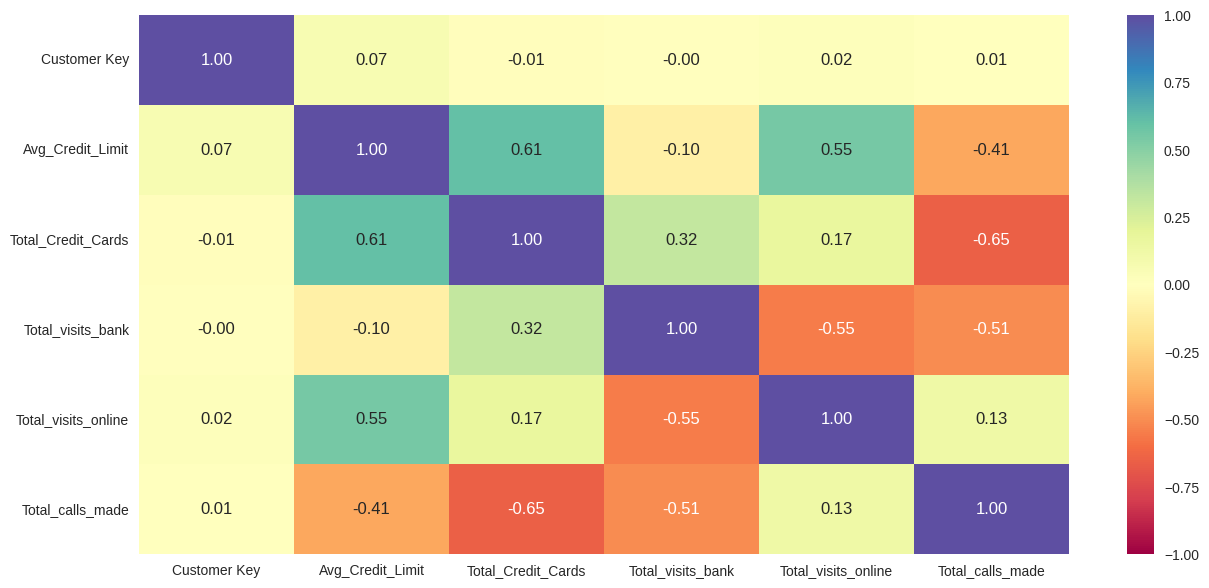

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

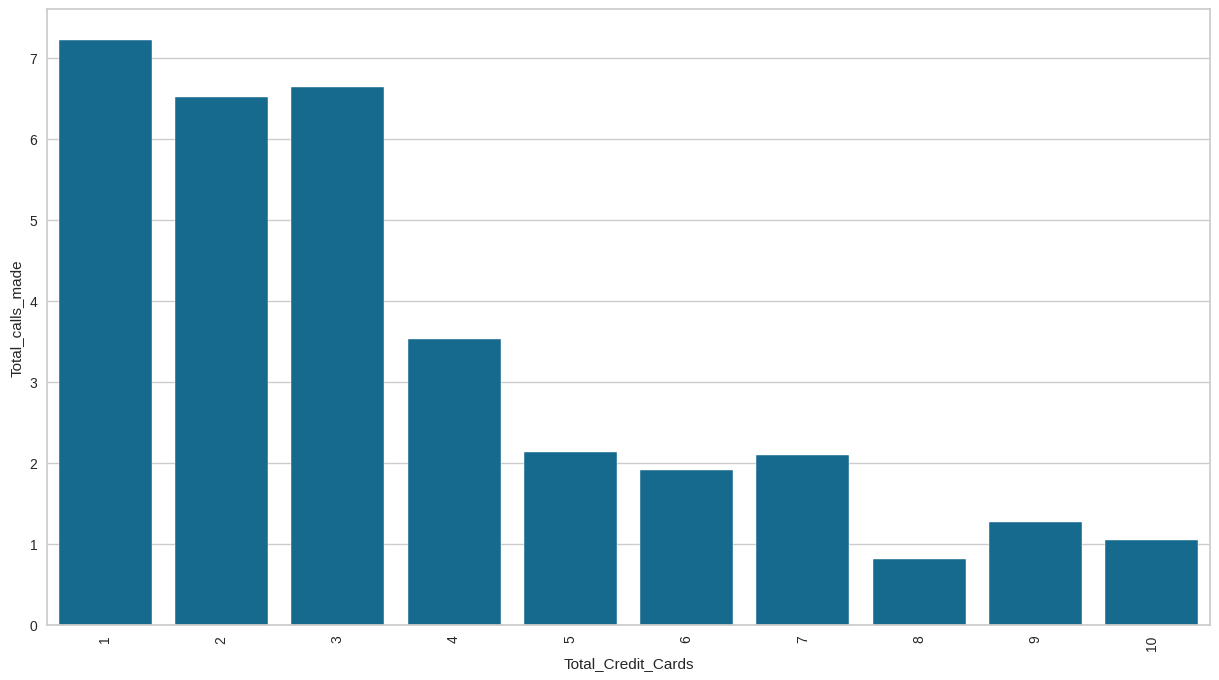

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Total_Credit_Cards', y='Total_calls_made', ci=False)
plt.xticks(rotation=90)
plt.show()

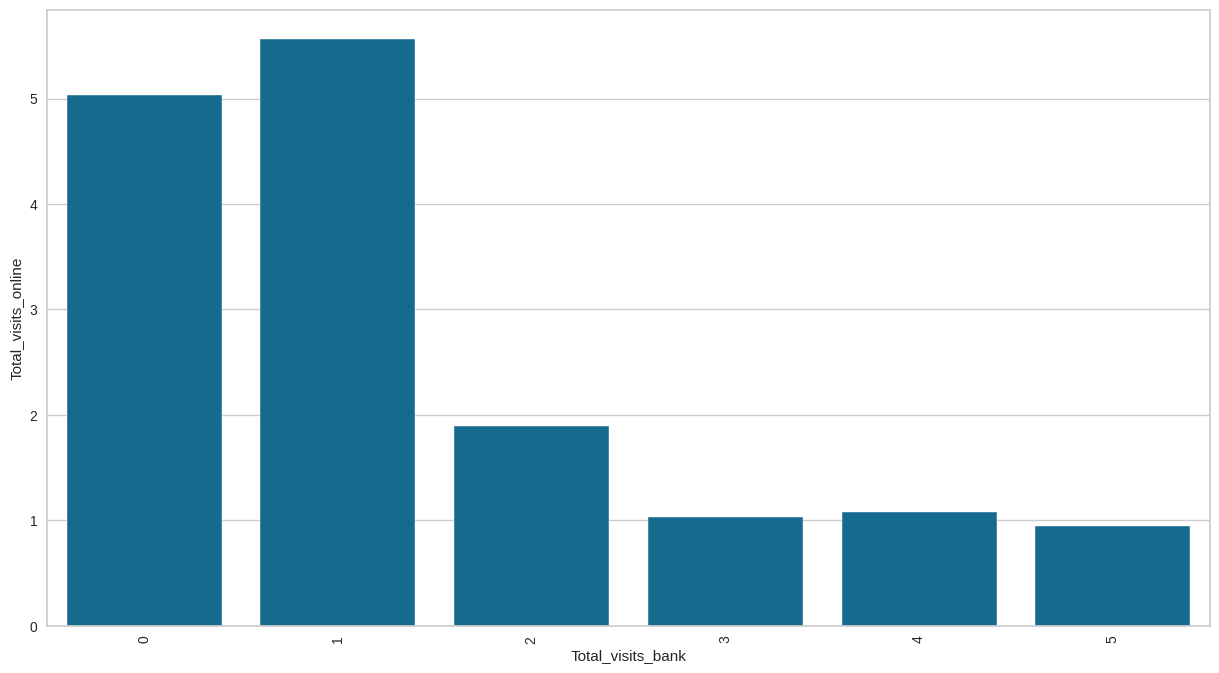

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Total_visits_bank', y='Total_visits_online', ci=False)
plt.xticks(rotation=90)
plt.show()

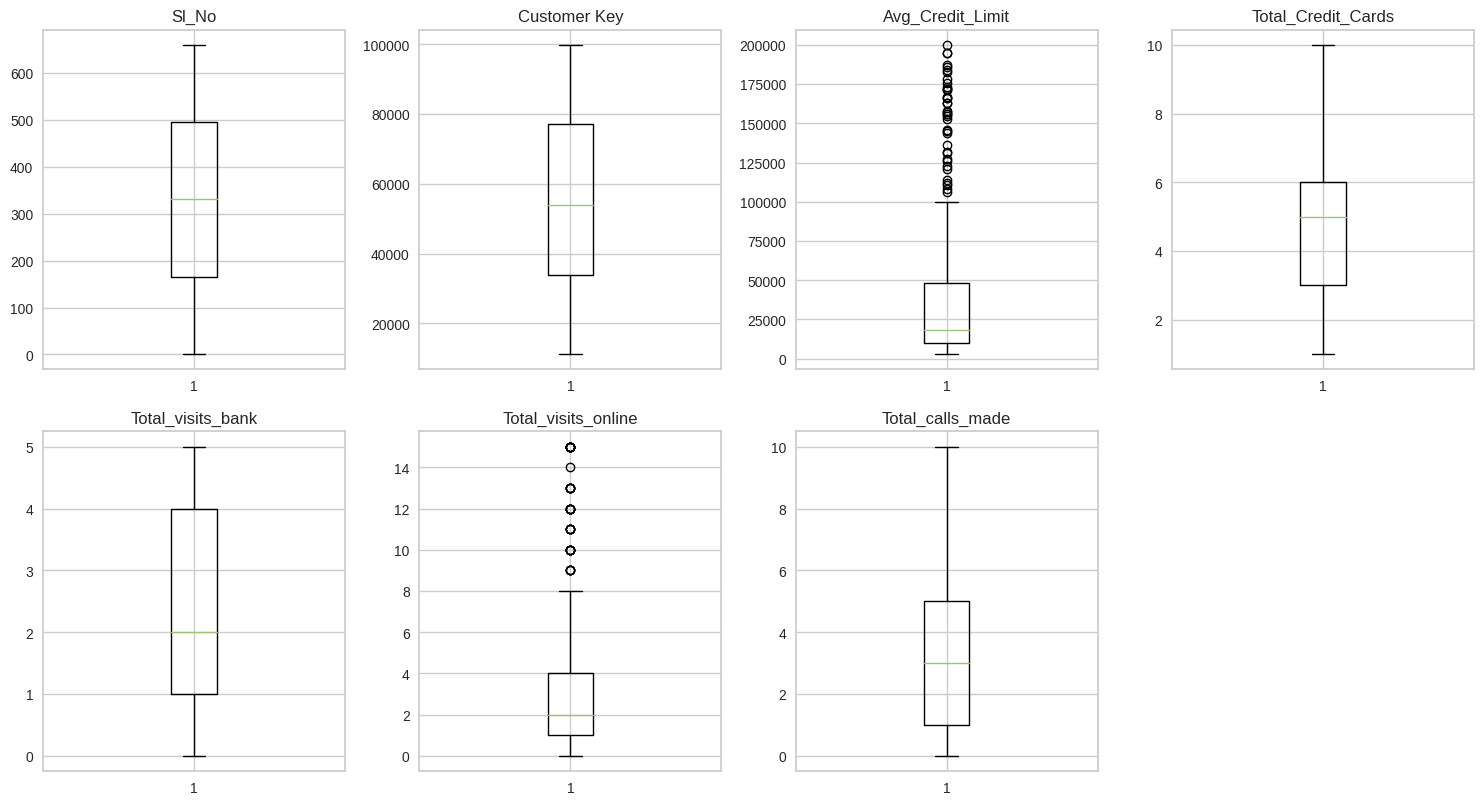

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

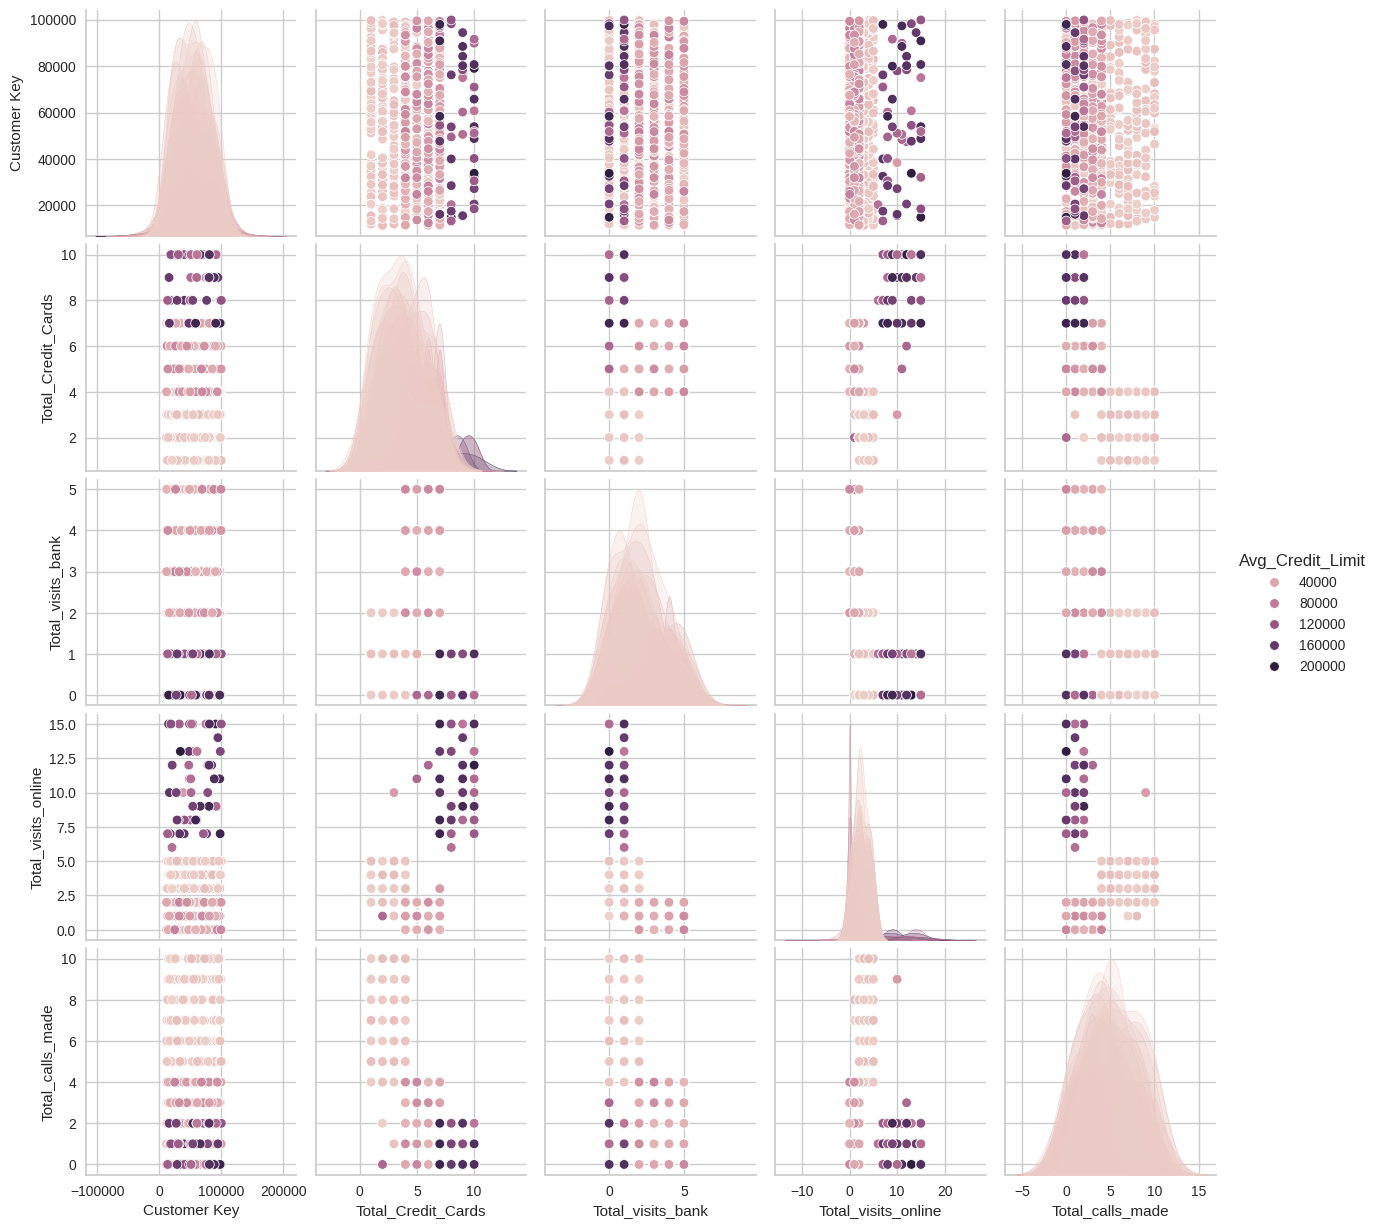

In [ ]:
sns.pairplot(data, hue='Avg_Credit_Limit');

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
# Create a subset of the data to be scaled (replace '...' with your desired columns)
subset = data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
subset_scaled = scaler.fit_transform(subset)


In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.7178787250175898
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0902973540817666
Number of Clusters: 5 	Average Distortion: 0.9906853650098948
Number of Clusters: 6 	Average Distortion: 0.9515009282361341
Number of Clusters: 7 	Average Distortion: 0.9094119827472316
Number of Clusters: 8 	Average Distortion: 0.9191292344244387
Number of Clusters: 9 	Average Distortion: 0.8990131857179275
Number of Clusters: 10 	Average Distortion: 0.8723089051392604
Number of Clusters: 11 	Average Distortion: 0.8353621156593081
Number of Clusters: 12 	Average Distortion: 0.80956116944126
Number of Clusters: 13 	Average Distortion: 0.7950761910849837
Number of Clusters: 14 	Average Distortion: 0.7740825528304727


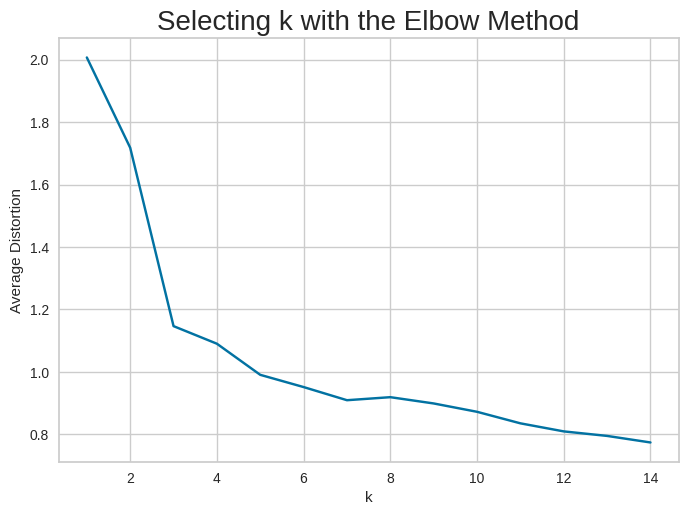

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

The appropriate value of k from the elbow curve seems to be 3.



For n_clusters = 2, the silhouette score is 0.5703183487340514)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3744071798973986)
For n_clusters = 5, the silhouette score is 0.27167502160723267)
For n_clusters = 6, the silhouette score is 0.24804756291576194)
For n_clusters = 7, the silhouette score is 0.24791254258020035)
For n_clusters = 8, the silhouette score is 0.22570382558070443)
For n_clusters = 9, the silhouette score is 0.19931783829027247)
For n_clusters = 10, the silhouette score is 0.20939001908412339)
For n_clusters = 11, the silhouette score is 0.21874494421167007)
For n_clusters = 12, the silhouette score is 0.21076471529358776)
For n_clusters = 13, the silhouette score is 0.2110262471212854)
For n_clusters = 14, the silhouette score is 0.21513441980318038)


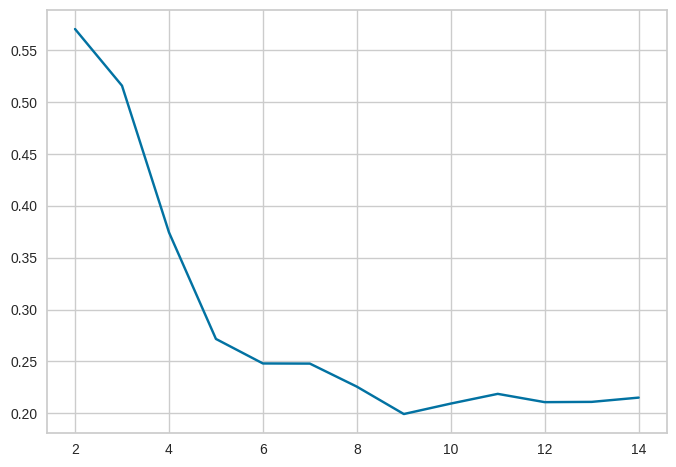

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

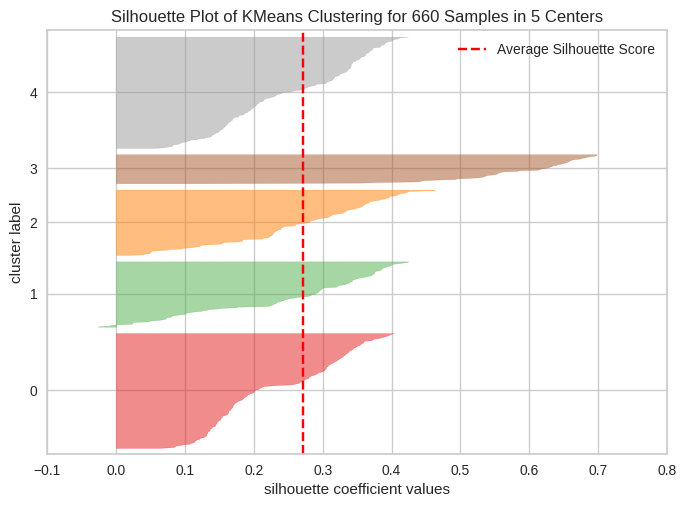

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=5, random_state=1))  ## Removed quotes from around n_clusters=5
visualizer.fit(k_means_df)
visualizer.show()


Creating Final Model

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=5, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

Cluster Profiling

In [ ]:
numeric_df1 = df1.select_dtypes(include='number')

km_cluster_profile = numeric_df1.groupby("KM_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Customer Key"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightyellow", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,,,
0,419.627551,54073.484694,36260.204082,5.551020,2.494898,0.954082,2.061224,196
1,122.955357,56043.991071,12401.785714,2.214286,0.910714,3.669643,8.535714,112
2,112.758929,54435.669643,11946.428571,2.607143,0.955357,3.437500,5.205357,112
3,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
4,415.363158,55714.684211,31226.315789,5.478947,4.515789,1.010526,1.936842,190


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following companies are present:
[87073 17341 40496 54838 35254 97825 35483 45909 14263 46813 35549 39122
 81531 18595 40898 27101 45088 23302 65372 56843 20072 47496 53936 66504
 51319 21233 74544 52025 45652 77026 49331 54906 94666 11698 34677 57565
 31384 16374 91987 51552 24998 45673 81863 23881 44645 17933 47437 85614
 96548 19137 69028 70779 67046 64897 36628 17565 11799 81940 66706 87838
 47866 61996 15318 89635 71862 88807 82376 80347 17649 44579 61994 24702
 27824 45878 72431 19215 85122 55060 31113 68439 88207 96929 78618 31551
 29864 45440 97954 90189 55090 33991 88884 45808 53932 65908 25321 48602
 48657 49913 53002 82807 93496 37252 41287 52460 58019 87219 36839 48667
 42887 14439 81166 14816 11265 84351 89446 64774 53166 36504 15798 84360
 46776 67258 44804 29919 74446 36632 76024 75065 51682 56367 95147 23102
 20043 44144 53552 62530 41741 61216 83192 82023 64550 17382 27117 21717
 81910 76492 43000 48692 43034 13140 91242 63710 90860 58708 57451 69868


In [ ]:
df1.groupby(["KM_segments", "Avg_Credit_Limit"])['Customer Key'].count()

KM_segments  Avg_Credit_Limit
0            5000                4
             6000                9
             7000                4
             8000                8
             9000                1
                                ..
4            71000               3
             72000               2
             73000               1
             74000               4
             75000               1
Name: Customer Key, Length: 201, dtype: int64

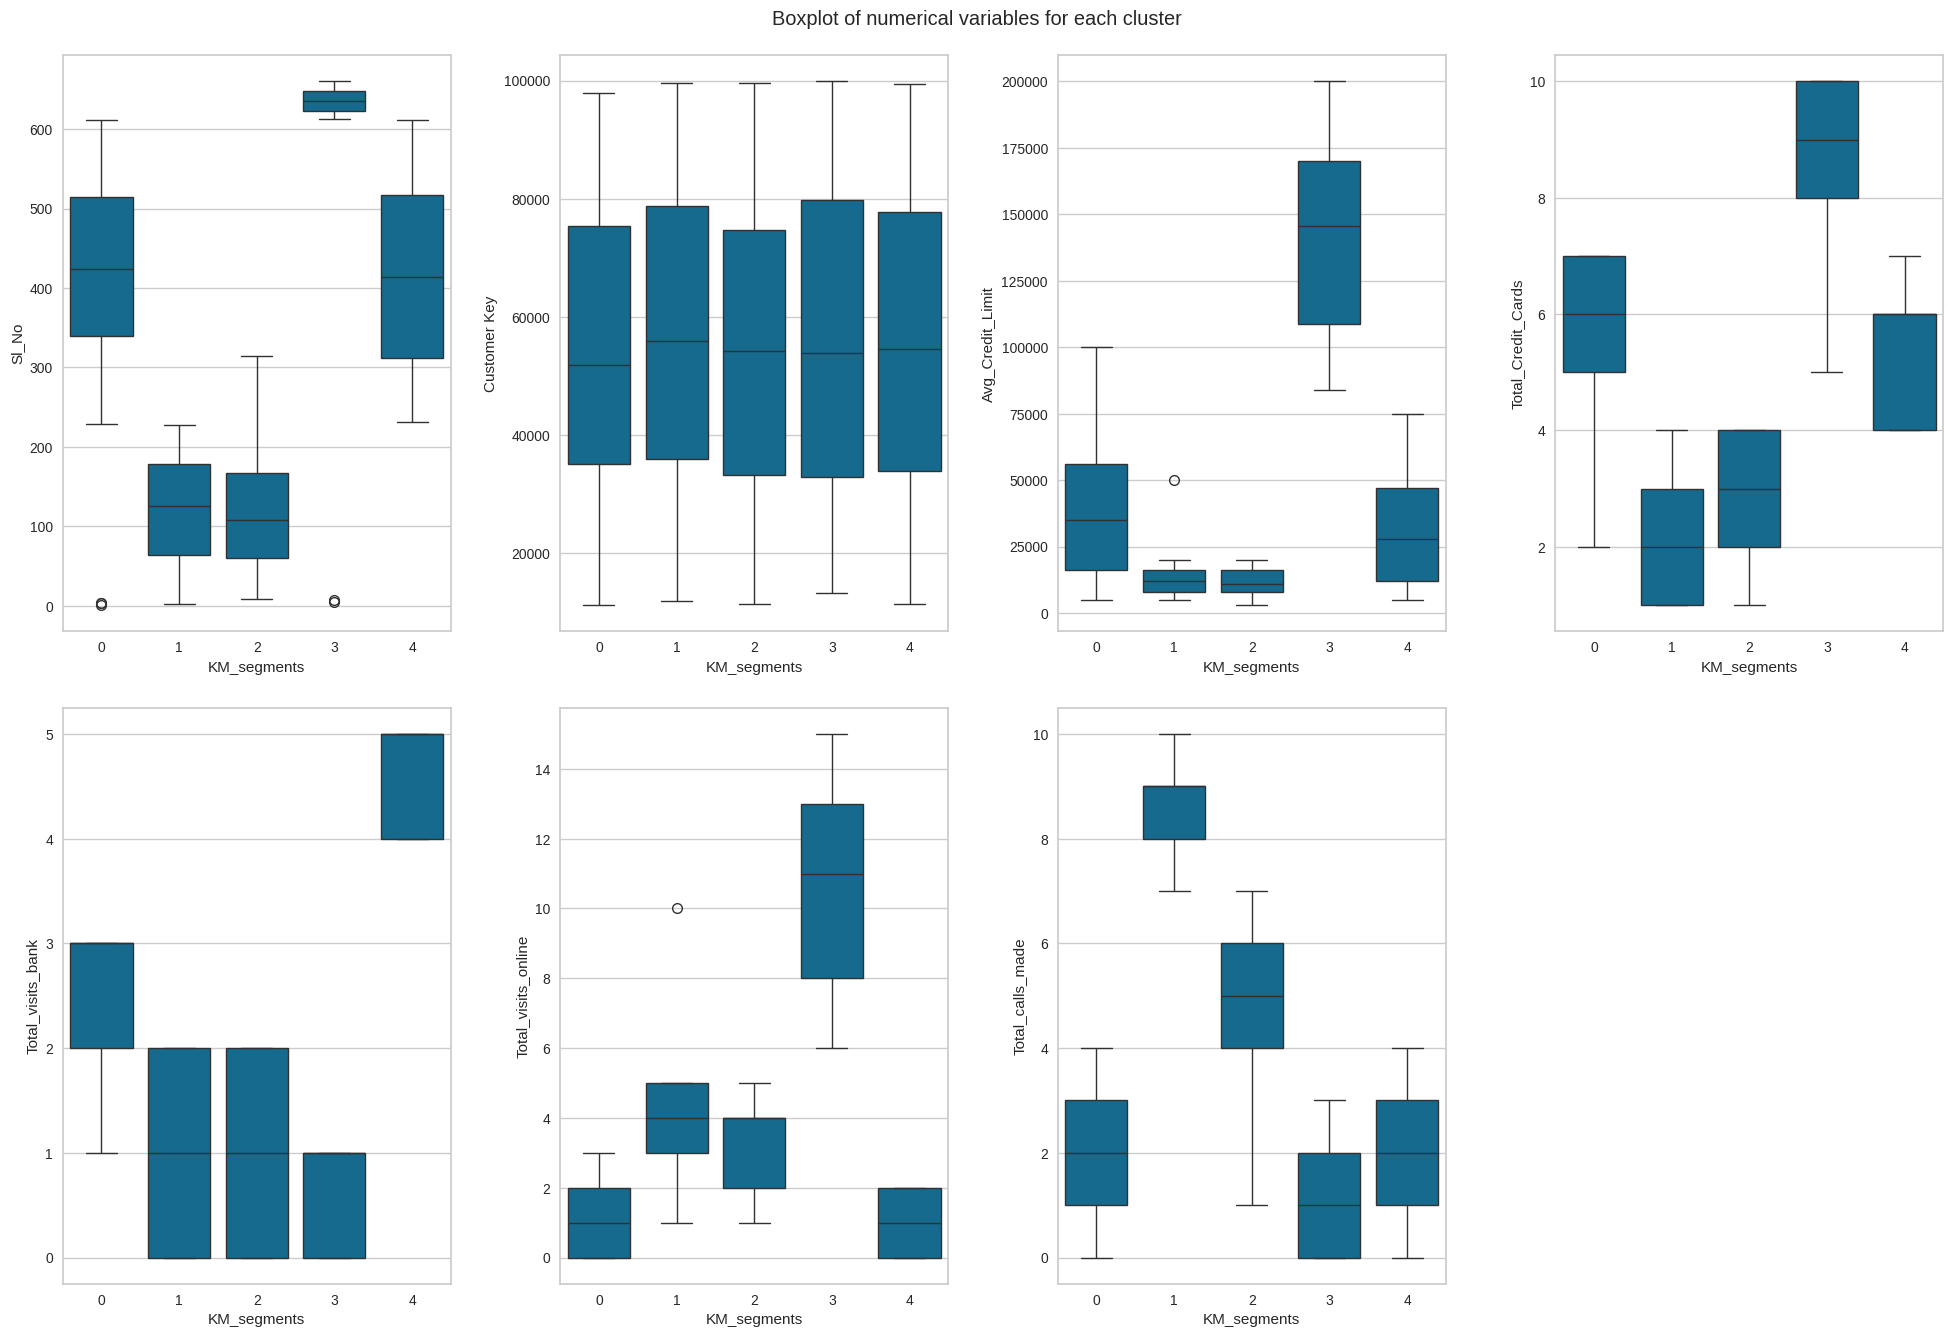

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

Hierarchical Clustering


Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.



Let's explore different linkage methods with Euclidean distance only.

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.
****************************************************************************************************
Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


Checking Dendrograms

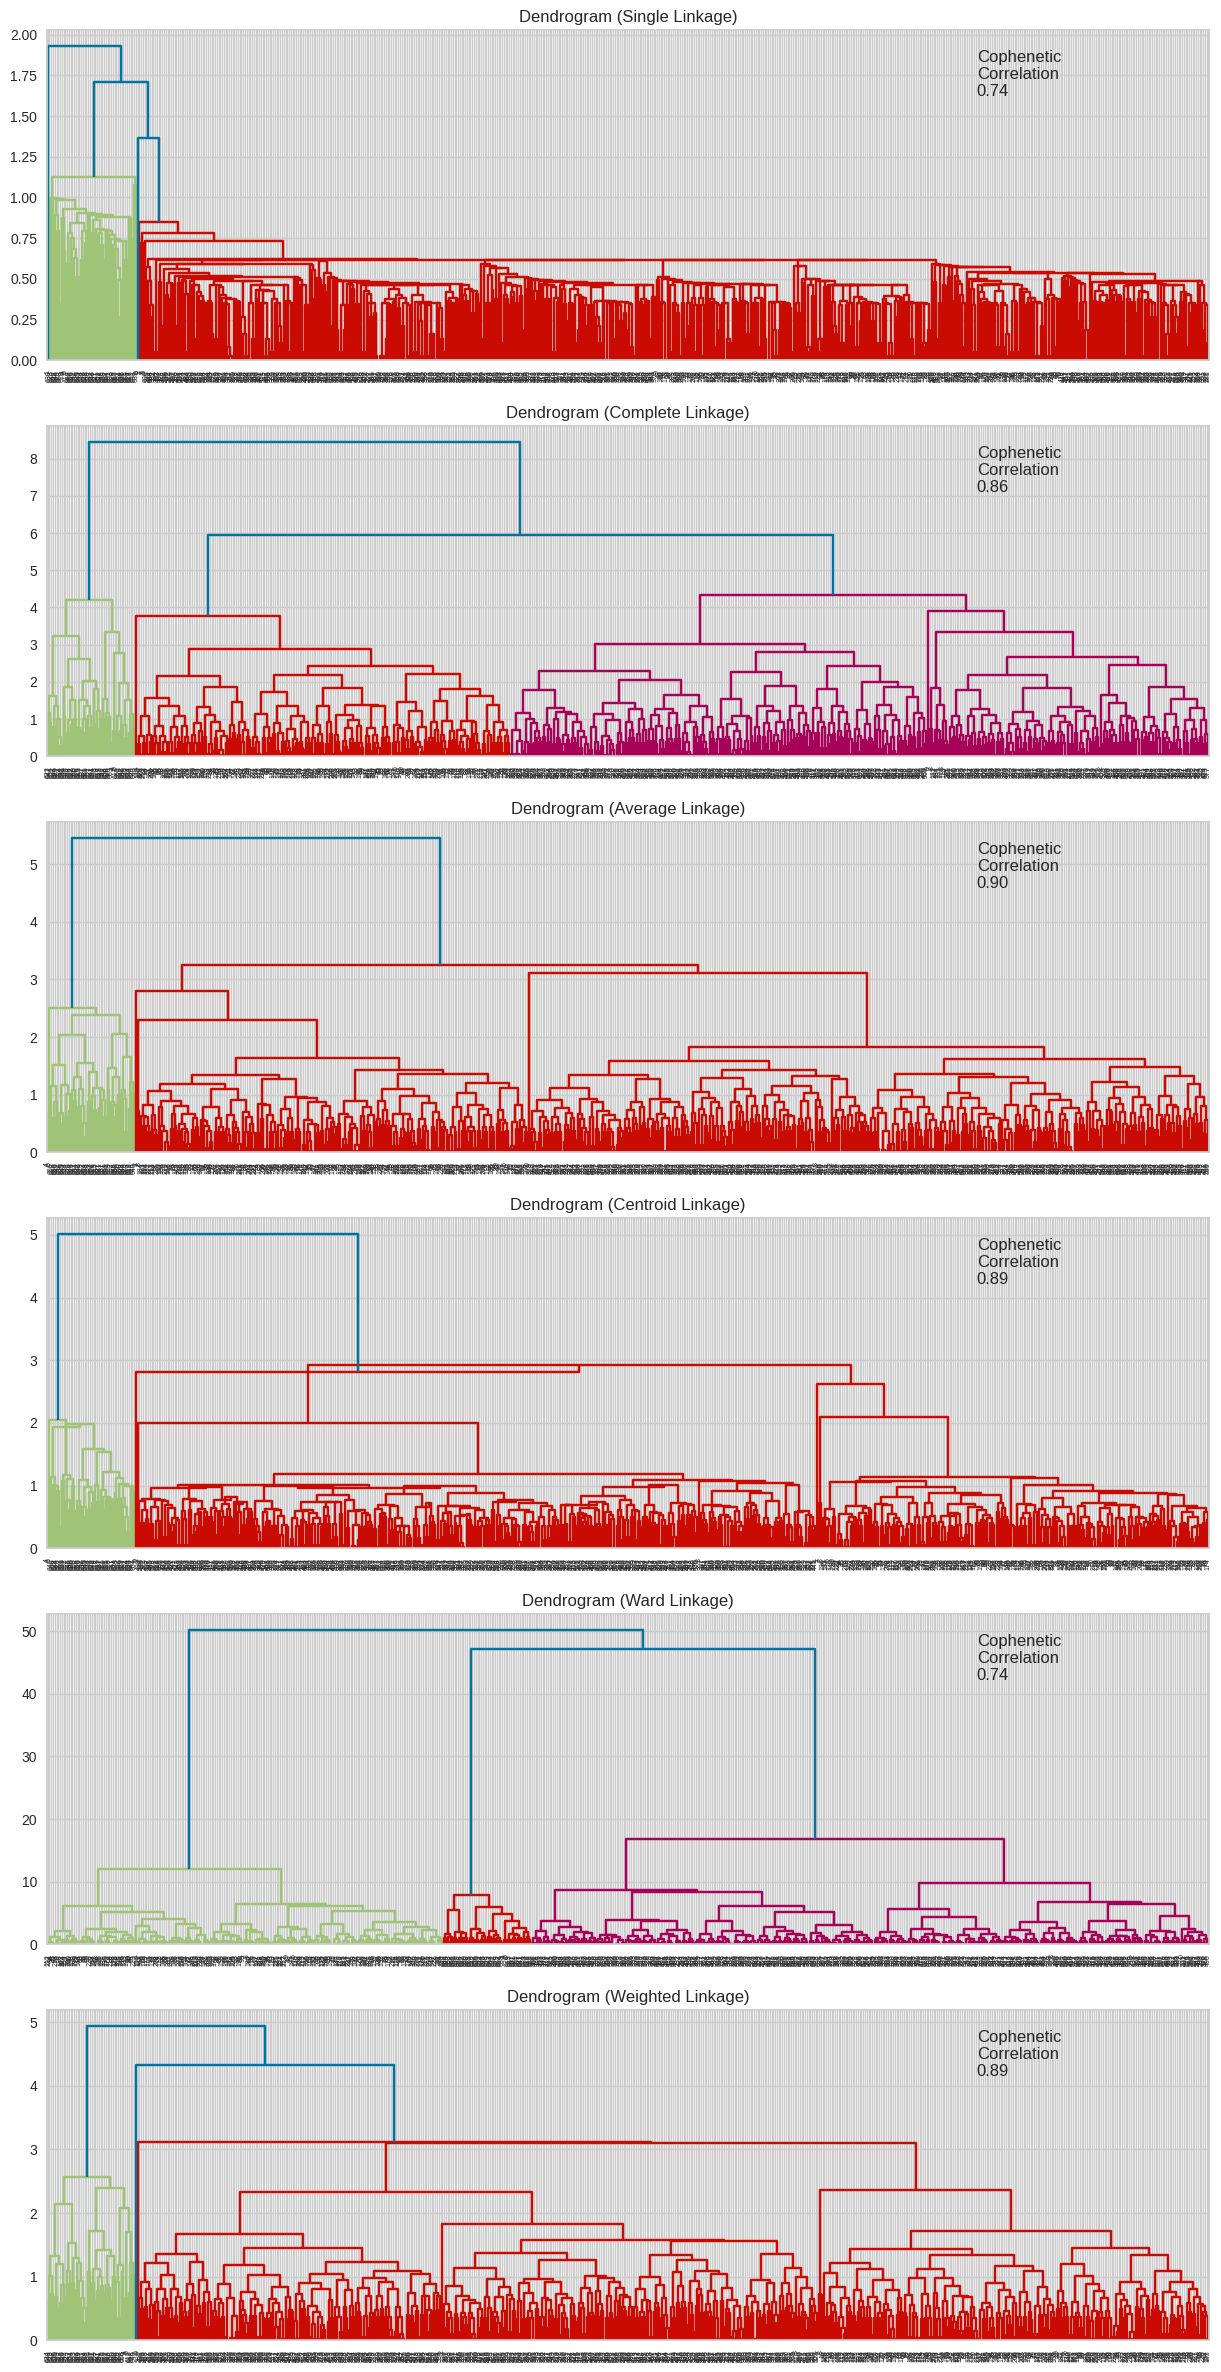

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
4,ward,0.741516
1,complete,0.859973
5,weighted,0.886175
3,centroid,0.893939
2,average,0.897708


Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, linkage='average')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

Cluster Profiling

In [ ]:
numeric_df2 = df2.select_dtypes(include=['number'])

hc_cluster_profile = numeric_df2.groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Customer Key"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightyellow", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,,,
0,417.260982,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,116.977578,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408,223


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following companies are present:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 72156 24998 45673 11596 87485 28414 81863 33240
 11466 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437
 22610 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897
 46223 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886
 66804 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376
 98126 80347 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824


In [ ]:
df2.groupby(["HC_segments", "Avg_Credit_Limit"])['Customer Key'].count()

HC_segments  Avg_Credit_Limit
0            5000                 8
             6000                14
             7000                12
             8000                15
             9000                10
             10000               12
             11000                9
             12000               10
             13000               10
             14000                9
             15000                6
             16000                9
             17000               10
             18000               14
             19000               13
             20000                7
             25000                1
             26000                5
             27000                2
             28000                3
             29000                5
             30000                6
             31000                5
             32000                2
             33000                4
             34000                6
             35000                2
             36000               11
             37000                6
             38000                8
             39000                7
             40000                3
             41000                6
             42000                2
             43000                1
             44000                3
             45000                3
             46000                3
             47000                6
             48000                6
             49000                4
             50000                7
             51000                4
             52000                6
             54000                4
             55000                1
             56000                7
             57000                3
             58000                3
             59000                4
             60000                5
             61000                3
             62000                3
             63000                2
             64000                4
             65000                5
             66000                4
             67000                3
             68000                7
             69000                4
             70000               10
             71000                4
             72000                3
             73000                4
             74000                6
             75000                2
             100000               1
1            84000                2
             91000                1
             94000                1
             95000                1
             96000                1
             97000                1
             98000                1
             99000                1
             100000               2
             106000               1
             108000               1
             111000               1
             112000               1
             114000               1
             121000               1
             123000               1
             126000               1
             127000               1
             131000               1
             132000               1
             136000               1
             144000               1
             145000               1
             146000               1
             153000               1
             155000               1
             156000               2
             157000               1
             158000               1
             163000               2
             166000               2
             167000               1
             171000               1
             172000               2
             173000               1
             176000               1
             178000               1
             183000               1
             184000               1
             186000               1
             187000               1
             195000               2
             200000               1
2         

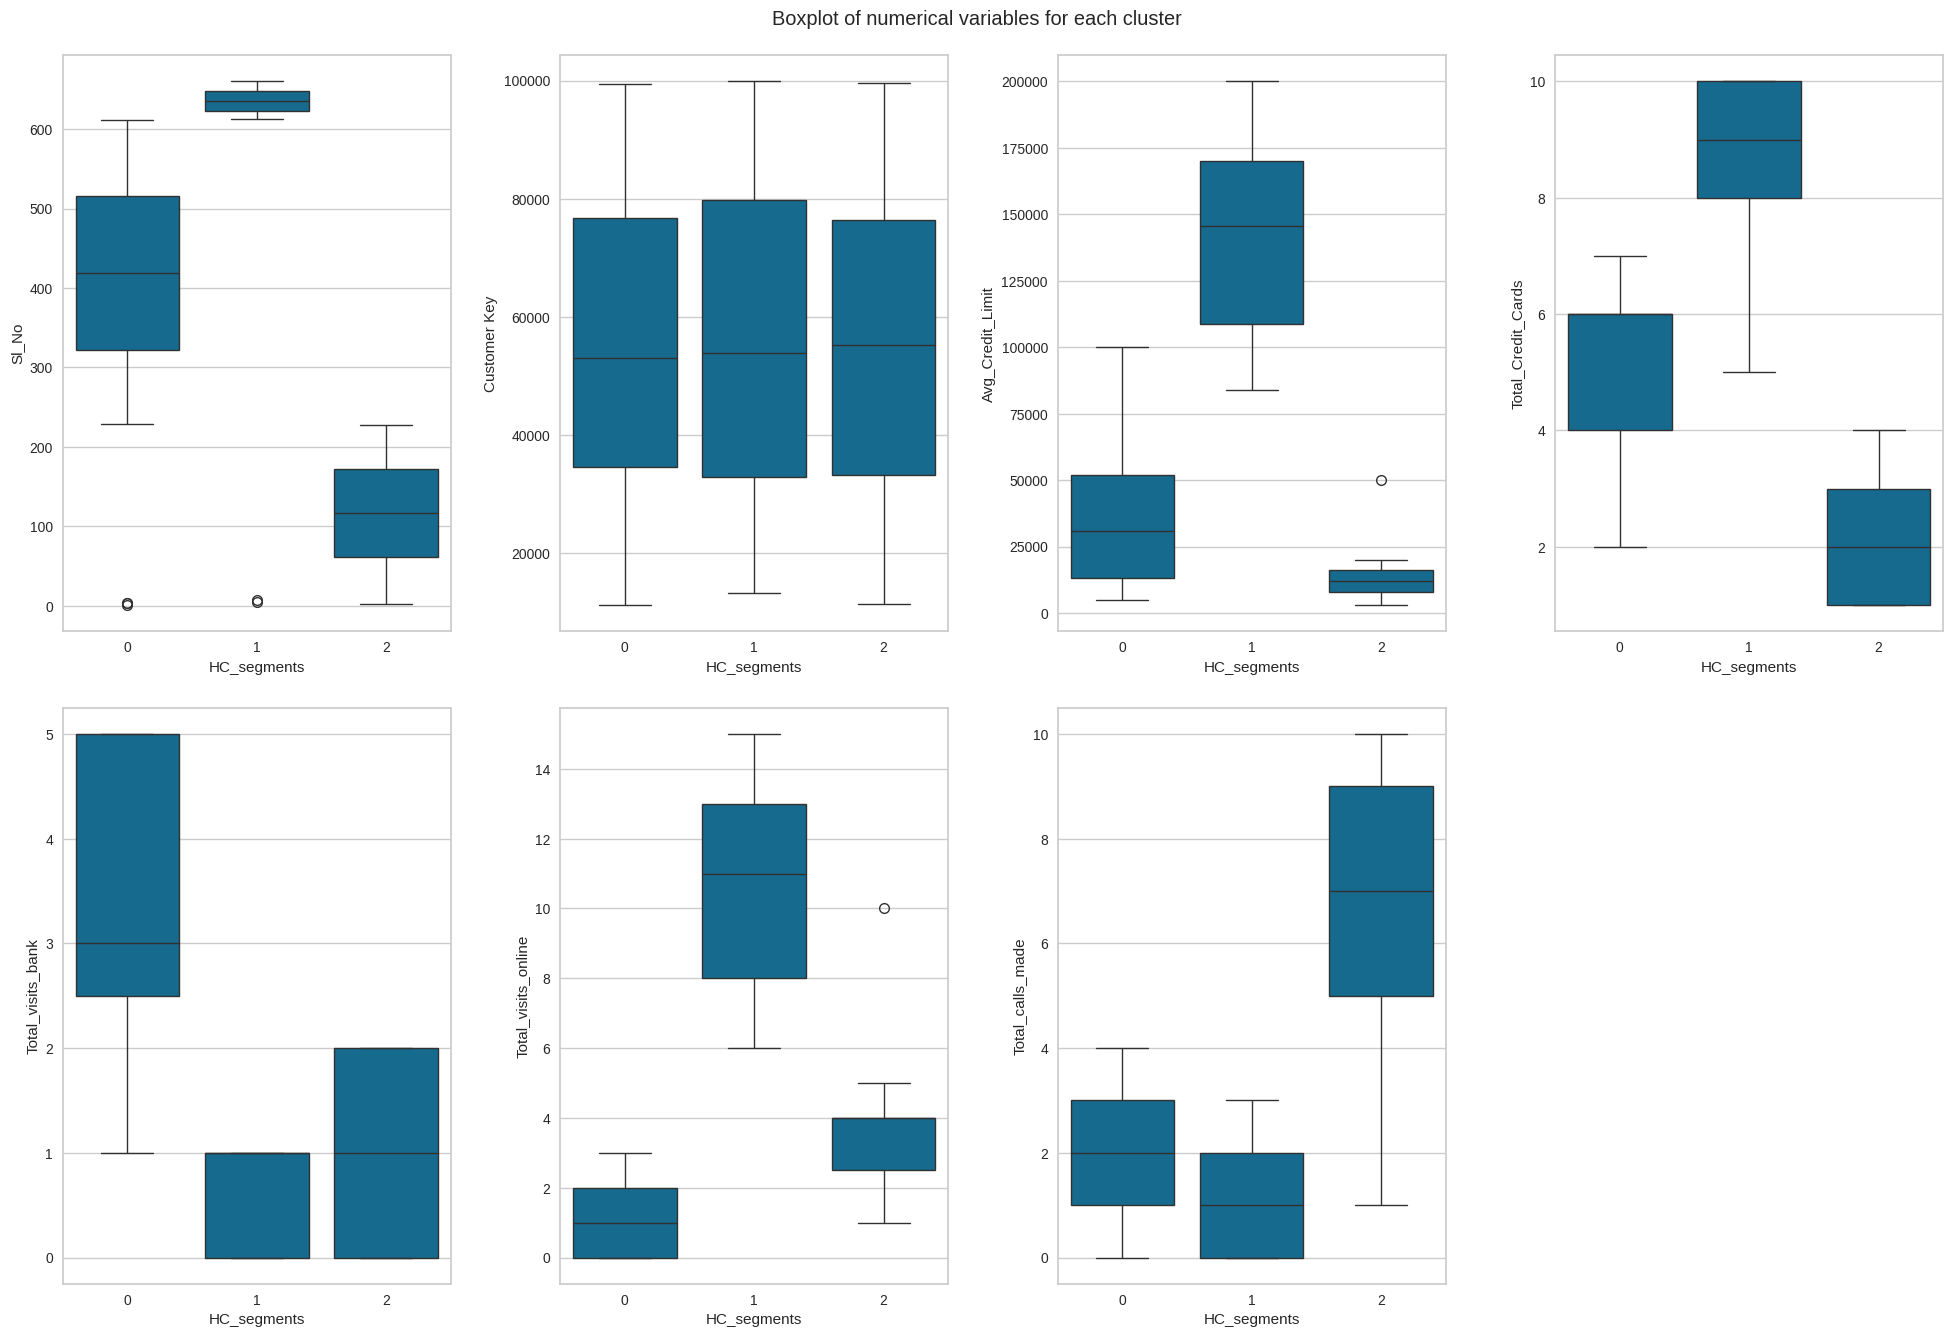

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

Actionable Insights and Recommendations